## Exercises 3

In these excercises the European call-option price and the European put-option price were calculated using a Monte Carlo method. The results were later compared to the analytic Black-Scholes solution. 

The following parameters were set to the same fixed values in all the exercises below:
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

In general, given an asset price S(t), the call-option price and the put-option price can be evaluated as:
- call-option price: $C[S(t), t] = \max{[0, S(t) - K]} e^{(-rT)}$,
- put-option price: $P[S(t), t] = \max{[0, K - S(t)]} e^{(-rT)}$.

### For comparison, Black-Scholes analytic solution:

In [2]:
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print("Analytic solution:")
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

Analytic solution:
 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


In [3]:
call

14.975790778311286

In [4]:
put

5.4595325819072364

### Part 1: Direct sampling

In this first part, the European call-option price and European put-option price were calculated by a direct sample of the final asset price S(T): $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    where $W(t)\sim\mathcal{N}(0,t)$.
    
The MC simulation was carried out M=$10^4$ times, divided in N=100 blocks using the data blocking method. The graphs below illustrate the trends of the average call-option or put-option prices considering an increasing number of blocks from 1 to N=100.

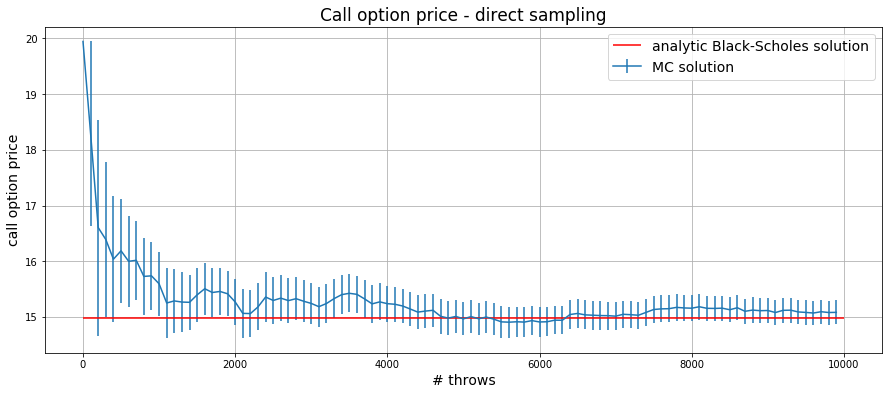

In [12]:
##call direct sampling
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

N=100
L=100
call_mc = np.loadtxt( 'direct_call.dat',max_rows=N )
err = np.loadtxt( 'direct_call_err.dat', max_rows=N )
x = np.arange(N)
x*=L

plt.figure(figsize=(15,6))
plt.errorbar(x,call_mc,yerr=err, label="MC solution")
plt.hlines(y=call, xmin=0, xmax=(N*L),label="analytic Black-Scholes solution", color = "red")
plt.xlabel('# throws',size=14)
plt.ylabel('call option price',size=14)
plt.title("Call option price - direct sampling", size=17)
plt.legend(loc="upper right" , fontsize=14)
plt.grid(True)
plt.show()

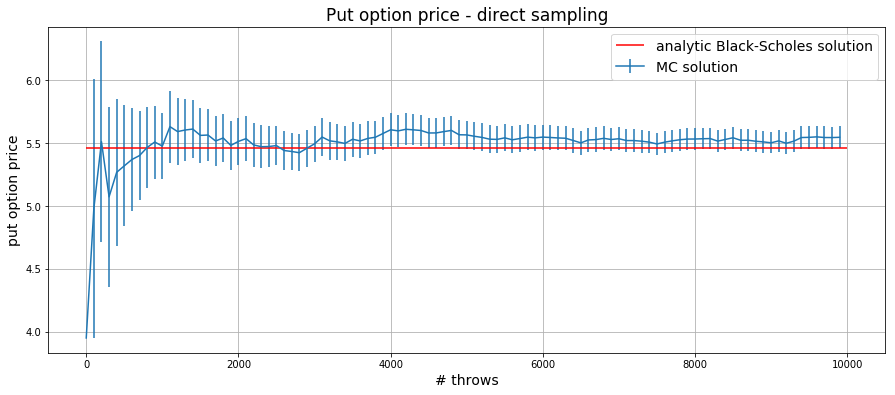

In [11]:
##put option - direct sampling
N=100
L=100
put_mc = np.loadtxt( 'direct_put.dat',max_rows=N )
err = np.loadtxt( 'direct_put_err.dat', max_rows=N )
x = np.arange(N)
x*=L

plt.figure(figsize=(15,6))
plt.errorbar(x,put_mc,yerr=err, label="MC solution")
plt.hlines(y=put, xmin=0, xmax=(N*L),label="analytic Black-Scholes solution", color = "red")
plt.xlabel('# throws',size=14)
plt.ylabel('put option price',size=14)
plt.title("Put option price - direct sampling", size=17)
plt.legend(loc="upper right" , fontsize=14)
plt.grid(True)
plt.show()

As can be noticed from the graphs, both the call-option price and the put-option price converge to the analytic solution.

### Part 2: Discrete sampling

In this second part, the European call-option price and European put-option price were calculated by a discrete sampling of the asset price S(t). In order to do so, the period up to the delivery time T was divided in 100 sub-intervals and the asset price S(t) was calculated recursively for each $t_i$: 

$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$.
    
The call-option price and the put-option price were then evaluated for the final asset price $S(T)$.
    
The MC simulation was carried out M=$10^4$ times, divided in N=100 blocks using the data blocking method. The graphs below illustrate the trends of the average call-option or put-option prices considering an increasing number of blocks from 1 to N=100.

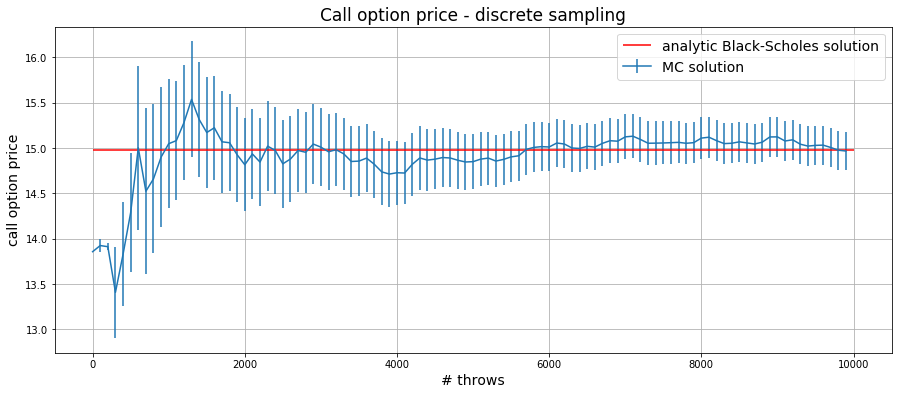

In [10]:
## Call option - discrete sampling
N=100
L=100
call_mc = np.loadtxt( 'discrete_call.dat',max_rows=N )
err = np.loadtxt( 'discrete_call_err.dat', max_rows=N )
x = np.arange(N)
x*=L

plt.figure(figsize=(15,6))
plt.errorbar(x,call_mc,yerr=err, label="MC solution")
plt.hlines(y=call, xmin=0, xmax=(N*L),label="analytic Black-Scholes solution", color = "red")
plt.xlabel('# throws',size=14)
plt.ylabel('call option price',size=14)
plt.title("Call option price - discrete sampling", size=17)
plt.legend(loc="upper right" , fontsize=14)
plt.grid(True)
plt.show()

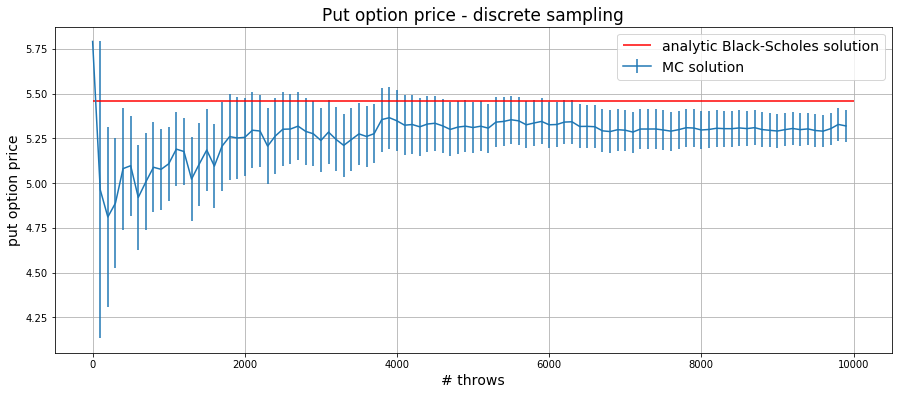

In [9]:
##put option - discrete sampling
N=100
L=100
put_mc = np.loadtxt( 'discrete_put.dat',max_rows=N )
err = np.loadtxt( 'discrete_put_err.dat', max_rows=N )
x = np.arange(N)
x*=L

plt.figure(figsize=(15,6))
plt.errorbar(x,put_mc,yerr=err, label="MC solution")
plt.hlines(y=put, xmin=0, xmax=(N*L),label="analytic Black-Scholes solution", color = "red")
plt.xlabel('# throws',size=14)
plt.ylabel('put option price',size=14)
plt.title("Put option price - discrete sampling", size=17)
plt.legend(loc="upper right" , fontsize=14)
plt.grid(True)
plt.show()